# Week 4 Problem Set

## Homeworks

In [1]:
%load_ext nb_mypy
%nb_mypy On

Version 1.0.2


In [2]:
from typing import TypeAlias
from typing import Optional, Any
from typing import Callable
from __future__ import annotations


Number: TypeAlias = int | float

**HW0.** We are going to create a class that contains both `RobotTurtle` and `Coordinate` class. The name of the class is `TurtleWorld` which is used to simulate when `RobotTurtle` is moving around some two dimensional space. The class has the following methods:

- `add_turtle(name)` which is to add a new `RobotTurtle` into the world with the specified name.
- `remove_turtle(name)` which is to remove the object `RobotTurtle` with the specified name from the world. 
- `list_turtles()` which is to list all the turtles in the world using their names in an ascending order.

We give you here the class definition for the `Coordinate` and the `RobotTurtle` from the Notes.

In [3]:
import math

class Coordinate:
    
    def __init__(self, x: Number=0, y: Number=0):
        self.x: Number = x
        self.y: Number = y
        
    @property
    def distance(self) -> Number:
        return math.sqrt(self.x * self.x + self.y * self.y)
    
    def __str__(self) -> str:
        return f"({self.x}, {self.y})"

In [4]:
# Class definition
class RobotTurtle:
    # Attributes:
    def __init__(self, name: str, speed: int=1) -> None:
        self.name: str = name
        self.speed: int = speed
        self._pos: Coordinate = Coordinate(0, 0)
        
    # property getter
    @property
    def name(self) -> str:
        return self._name
    
    # property setter
    @name.setter
    def name(self, value: str) -> None:
        if isinstance(value, str) and value != "":
            self._name: str = value
            
    # property getter
    @property
    def speed(self) -> int:
        return self._speed
    
    # property setter
    @speed.setter
    def speed(self, value: int) -> None:
        if isinstance(value, int) and value > 0:
            self._speed: int = value

    # property getter
    @property
    def pos(self) -> Coordinate:
        return self._pos
    
    # Methods:
    def move(self, direction: str) -> None:
        update: dict[str, Coordinate] = {'up' : Coordinate(self.pos.x, self.pos.y + self.speed),
                                        'down' : Coordinate(self.pos.x, self.pos.y - self.speed),
                                        'left' : Coordinate(self.pos.x - self.speed, self.pos.y),
                                        'right' : Coordinate(self.pos.x + self.speed, self.pos.y)}
        self._pos = update[direction]

        
    def tell_name(self) -> None:
        print(f"My name is {self.name}")


**HW1.** Now fill in the class definition for `TurtleWorld`. You may want to look into the test cases in the following cell to make sure you define the class properly.

In [5]:
class TurtleWorld:
    
    def __init__(self) -> None:
        self.turtles: dict[str, RobotTurtle] = {}
        
    def add_turtle(self, name: str, speed: int) -> None:
        self.turtles.update({name:RobotTurtle(name,speed)})
        
    def remove_turtle(self, name: str) -> None:
        self.turtles.pop(name)
        
    def list_turtles(self) -> list[str]:
        return sorted(list(self.turtles.keys()))

In [6]:
world: TurtleWorld = TurtleWorld()
world.add_turtle('t1', 1)
assert world.list_turtles() == ['t1']

world.add_turtle('t2', 2)
assert world.list_turtles() == ['t1', 't2']

world.add_turtle('abc', 3)
assert world.list_turtles() == ['abc', 't1', 't2']

world.remove_turtle('t2')
assert world.list_turtles() == ['abc', 't1']

world.remove_turtle('abc')
assert world.list_turtles() == ['t1']


In [7]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW2.** Modify the class `TurtleWorld` to add the following method:
- `move_turtle(name, movement)` which is to move the turtle with the specified name with a given input `movement`. The argument `movement` is a string containing letters: `l` for left, `r` for right, `u` for up, and `d` for down. The movement should be based on the speed. This means that if the turtle has speed of 2 and the `movement` argument is `uulrdd`, the turtle should move up four units, move left two units, move right two units and move down four units.

In [8]:
class TurtleWorld:
    valid_movements: set[str] = set('udlr')
    movement_map: dict[str, str] = {'u': 'up', 'd': 'down', 'l': 'left', 'r': 'right'}
    
    def __init__(self) -> None:
        self.turtles: dict[str, RobotTurtle] = {}
        
    def move_turtle(self, name: str, movement: str) -> None:
        if name in self.turtles:
            turtle = self.turtles[name]
            for move in movement:
                if move == 'l':
                    turtle.move('left')
                elif move == 'r':
                    turtle.move('right')
                elif move == 'u':
                    turtle.move('up')
                elif move == 'd':
                    turtle.move('down')

    
    def add_turtle(self, name: str, speed: int) -> None:
        self.turtles.update({name:RobotTurtle(name,speed)})
        
    def remove_turtle(self, name: str) -> None:
        self.turtles.pop(name)
        
    def list_turtles(self) -> list[str]:
        return sorted(list(self.turtles.keys()))

In [9]:
world: TurtleWorld = TurtleWorld()
world.add_turtle('abc', 1)
world.move_turtle('abc', 'uu')
assert str(world.turtles['abc'].pos) == '(0, 2)'

world.move_turtle('abc', 'rrr')
assert str(world.turtles['abc'].pos) == '(3, 2)'

world.move_turtle('abc', 'd')
assert str(world.turtles['abc'].pos) == '(3, 1)'

world.move_turtle('abc', 'llll')
assert str(world.turtles['abc'].pos) == '(-1, 1)'

world.add_turtle('t1', 2)
world.move_turtle('t1', 'uulrdd')
assert str(world.turtles['t1'].pos) == '(0, 0)'

world.move_turtle('t1', 'ururur')
assert str(world.turtles['t1'].pos) == '(6, 6)'



In [10]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW3.** Extend the class `Fraction` to support the following operator: `+` and `==`. To do this, you need to overload the following operator:
- `__add__(self, other)`
- `__eq__(self, other)`

You may want to write a method to simplify a fraction:
- `simplify()`: which simplify a fraction to its lowest terms. To simplify a fraction divide both the numerator and the denominator with the greatest common divisor of the the two. This method should return a new `Fraction` object.


In [11]:
def gcd(a: int, b: int) -> int:
    if b == 0:
        return a
    else:
        return gcd(b, a % b)


class Fraction:
    def __init__(self, num: int, den: int) -> None:
        self.num = num
        self.den = den if den != 0 else 1
    
    @property
    def num(self) -> int:
        return self._num
    
    @num.setter
    def num(self, val: int) -> None:
        if isinstance(val, (int, float)):
            self._num = int(val)
        else:
            print("Numerator must be an integer or float")
    
    @property
    def den(self) -> int:
        return self._den
    
    @den.setter
    def den(self, val: int) -> None:
        if isinstance(val, (int, float)):
            val = int(val)
            if val == 0:
                self._den = 1
            else:
                self._den = val
        else:
            print("Denominator must be an integer or float")
    
    def __str__(self) -> str:
        return f"{self.num}/{self.den}"    
    
    def simplify(self) -> Fraction:
        common_divisor = gcd(self.num,self.den)
        return Fraction(self.num//common_divisor,self.den//common_divisor)
    
    def __add__(self, other) -> Fraction:
        new_num = self.num*other.den + other.num*self.den
        new_den = self.den*other.den
        return Fraction (new_num,new_den).simplify()
        
    
    def __eq__(self, other) -> bool:
        simp_self = self.simplify()
        simp_other = other.simplify()
        return (simp_self.den == simp_other.den and simp_self.num ==simp_other.num)
    


In [12]:
f1: Fraction = Fraction(1, 2)
f2: Fraction = Fraction(2, 3)
f3: Fraction = f1 + f2 

assert str(f3) == "7/6"

f4: Fraction = Fraction(3, 5)
f5: Fraction = Fraction(1, 3)
f6: Fraction = f4 + f5 

assert str(f6) == "14/15"

f7: Fraction = f1 + f1

assert str(f7) == "1/1"

f1 = Fraction(1, 2)
f2 = Fraction(2, 4)
assert f1 == f2

f3 = Fraction(2, 3)
f4 = Fraction(2, 4)
assert f3 != f4


In [13]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW4.** Extend the class `Fraction` to implement the other operators: `- * < <= > >=`.

In [14]:
def gcd(a: int, b: int) -> int:
    if b == 0:
        return a
    else:
        return gcd(b, a % b)


def gcd(a: int, b: int) -> int:
    if b == 0:
        return a
    else:
        return gcd(b, a % b)


class Fraction:
    def __init__(self, num: int, den: int) -> None:
        self.num = num
        self.den = den if den != 0 else 1
    
    @property
    def num(self) -> int:
        return self._num
    
    @num.setter
    def num(self, val: int) -> None:
        if isinstance(val, (int, float)):
            self._num = int(val)
        else:
            print("Numerator must be an integer or float")
    
    @property
    def den(self) -> int:
        return self._den
    
    @den.setter
    def den(self, val: int) -> None:
        if isinstance(val, (int, float)):
            val = int(val)
            if val == 0:
                self._den = 1
            else:
                self._den = val
        else:
            print("Denominator must be an integer or float")
    
    def __str__(self) -> str:
        return f"{self.num}/{self.den}"    
    
    def simplify(self) -> Fraction:
        common_divisor = gcd(self.num,self.den)
        return Fraction(self.num//common_divisor,self.den//common_divisor)
    
    def __add__(self, other) -> Fraction:
        new_num = self.num*other.den + other.num*self.den
        new_den = self.den*other.den
        return Fraction (new_num,new_den).simplify()
        
    
    def __eq__(self, other) -> bool:
        simp_self = self.simplify()
        simp_other = other.simplify()
        return (simp_self.den == simp_other.den and simp_self.num ==simp_other.num)
    

    
    def __sub__(self, other) -> Fraction:
        new_num = self.num * other.den - other.num * self.den
        new_den = self.den * other.den
        return Fraction(new_num, new_den).simplify()
    
    def __mul__(self, other) -> Fraction:
        new_num = self.num * other.num
        new_den = self.den * other.den
        return Fraction(new_num, new_den).simplify()
    
    def __lt__(self, other) -> bool:
        return self.num * other.den < other.num * self.den

    
    def __le__(self, other) -> bool:
        return self.num * other.den <= other.num * self.den
    
    def __gt__(self, other) -> bool:
        return self.num * other.den > other.num * self.den

    
    def __ge__(self, other) -> bool:
        return self.num * other.den >= other.num * self.den

    


<cell>8: error: Name "gcd" already defined on line 1


In [15]:
f1: Fraction = Fraction(3, 4)
f2: Fraction = Fraction(1, 2)
f3: Fraction = f1 - f2
assert f3 == Fraction(1, 4)
f4: Fraction = f1 * f2
assert f4 == Fraction(3, 8)
assert f2 < f1
assert f2 <= f2
assert f1 > f3
assert f3 >= f3


In [16]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW5.** Implement `Queue` abstract data structure using a Class. You can use a `list` as its internal data structure. The class should have the following interface:
- `__init__()` to initialize an empty List for the queue to store the items.
- `enqueue(item)` which inserts an Integer into the queue.
- `dequeue()` which returns and removes the element at the head of the queue. The return value is an optional as it may return `None` if there are no more elements in the queue.
- `peek()` which returns the element at the head of the queue. If there is no element in the Queue, return `None`. 

The class Queue has two computed properties:
- `is_empty` which returns either `True` or `False` depending on whether the queue is empty or not.
- `size` which returns the number of items in the queue.

In [17]:
class Queue:
    def __init__(self) -> None:
        self.__items: list[Any] = []
    
    def enqueue(self, item: Any) -> None:
        self.__items.append(item)

    
    def dequeue(self) -> Any:
        if self.is_empty:
            return None
        return self.__items.pop(0)
    
    def peek(self) -> Any:
        if self.is_empty:
            return None
        return self.__items[0]
    
    @property
    def is_empty(self) -> bool:
        return len(self.__items) == 0

    
    @property
    def size(self) -> int:
        return len(self.__items)

In [18]:
q1: Queue = Queue()
q1.enqueue(2)
assert not q1.is_empty
assert q1.size == 1
ans = q1.dequeue()
assert ans == 2
assert q1.is_empty
q1.enqueue(1)
q1.enqueue(2)
q1.enqueue(3)
assert q1.size == 3
assert q1.peek() == 1
assert q1.dequeue() == 1
assert q1.dequeue() == 2
assert q1.dequeue() == 3
assert q1.peek() == None


In [19]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [20]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW6.** **You need to complete CS4 before attempting this question.** Compute the computational time to do enqueue operation for a list based Queue implementation versus a double-stack based Queue implementation. Which one is faster? Why? There are a few parts you need to fill up.
- `enqueue(q, array)`, which is a function to enqueue every element in the array to the Queue `q`.
- `dequeue(q, array)`, which is a function to dequeue every element in the array from the Queue `q`. *Hint: you don't need the argument `array` but it is put here so that we can make use of the `run_function(f, x, y)`*.

You also need to replace some of the `None` in the code to compute the computational time inside the for-loop.

First you need to paste the Queue implementation using list-based.

In [21]:
class Stack:
    def __init__(self) -> None:
        self.__items: list[Any] = []

        
    def push(self, item: Any):
        self.__items.append(item)

    def pop(self) -> Any:
        if not self.is_empty:
            return self.__items.pop()
        return None

    def peek(self) -> Any:
        if not self.is_empty:
            return self.__items[-1]
        return None

    @property
    def is_empty(self) -> bool:
        return len(self.__items) == 0

    @property
    def size(self):
        return len(self.__items)

In [22]:
class Queue:
    def __init__(self) -> None:
        self.__items: list[Any] = []
    
    def enqueue(self, item: Any) -> None:
        self.__items.append(item)

    
    def dequeue(self) -> Any:
        if self.is_empty:
            return None
        return self.__items.pop(0)
    
    def peek(self) -> Any:
        if self.is_empty:
            return None
        return self.__items[0]
    
    @property
    def is_empty(self) -> bool:
        return len(self.__items) == 0

    
    @property
    def size(self) -> int:
        return len(self.__items)
    ###END SOLUTION
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [23]:
import time
import random

def run_function(f: Callable, x: Queue, y: list[Number]) -> float:
    start: float = time.time()
    f(x, y)
    end: float = time.time()
    return end-start

def enqueue(q: Queue, array: list[Number]) -> None:
        for item in array:
            q.enqueue(item)

def dequeue(q: Queue, array: list[Number]) -> None:
        while not q.is_empty:
            q.dequeue()

time_enqueue_list: list[float] = []
time_dequeue_list: list[float] = []

# set the maximum power for 10^power number of inputs
maxpower: int = 5
for n in range(1, maxpower + 1):
    # create array for 10^1, 10^2, 10^3, etc 
    # use seed = 100
    random.seed(100)
    array: Optional[list[Number]] = [random.random() for i in range(10**n)]
    
    # create queue
    queue: Optional[Queue] = Queue()
    
    # call run_function for enqueue
    result_enqueue: float = run_function(enqueue,queue,array)
    
    # call run_function for dequeue
    result_dequeue: float = run_function(dequeue,queue,array)
    
    ###
    ### YOUR CODE HERE
    ###
    
    time_enqueue_list.append(result_enqueue)
    time_dequeue_list.append(result_dequeue)

print(time_enqueue_list)
print(time_dequeue_list)

[3.337860107421875e-06, 1.6927719116210938e-05, 0.00013589859008789062, 0.0014150142669677734, 0.013172149658203125]
[1.2159347534179688e-05, 4.4345855712890625e-05, 0.0012526512145996094, 0.1207737922668457, 11.747491598129272]


Paste the code for the Queue using double Stack implementation.

In [24]:
# paste below the double Stack implementation of Queue
class Queue:
    def __init__(self) -> None:
        self.left_stack: Stack = Stack()
        self.right_stack: Stack = Stack()
    
    def enqueue(self, item: Any) -> None:
        self.left_stack.push(item)

    def dequeue(self) -> Any:
        if self.right_stack.is_empty:
            while not self.left_stack.is_empty:
                self.right_stack.push(self.left_stack.pop())
        return self.right_stack.pop()

    def peek(self) -> Any:
        if self.right_stack.is_empty:
            while not self.left_stack.is_empty:
                self.right_stack.push(self.left_stack.pop())
        return self.right_stack.peek()
    
    @property
    def is_empty(self) -> bool:
        return self.left_stack.is_empty and self.right_stack.is_empty
        
    @property
    def size(self) -> int:
        return self.left_stack.size + self.right_stack.size


In [29]:
import time
import random

def run_function(f: Callable, x: Queue, y: list[Number]) -> float:
    start: float = time.time()
    f(x, y)
    end: float = time.time()
    return end-start

def enqueue(q: Queue, array: list[Number]) -> None:
        for item in array:
            q.enqueue(item)

def dequeue(q: Queue, array: list[Number]) -> None:
        while not q.is_empty:
            q.dequeue()

time_enqueue_list: list[float] = []
time_dequeue_list: list[float] = []

# set the maximum power for 10^power number of inputs
maxpower: int = 5
for n in range(1, maxpower + 1):
    # create array for 10^1, 10^2, 10^3, etc 
    # use seed = 100
    random.seed(100)
    array: Optional[list[Number]] = [random.random() for i in range(10**n)]
    
    # create queue
    queue: Optional[Queue] = Queue()
    
    # call run_function for enqueue
    result_enqueue: float = run_function(enqueue,queue,array)
    
    # call run_function for dequeue
    result_dequeue: float = run_function(dequeue,queue,array)
    
    ###
    ### YOUR CODE HERE
    ###
    
    time_enqueue_list.append(result_enqueue)
    time_dequeue_list.append(result_dequeue)

print(time_enqueue_list)
print(time_dequeue_list)

<cell>33: error: Argument 2 to "run_function" has incompatible type "Optional[Queue]"; expected "Queue"
<cell>33: error: Argument 3 to "run_function" has incompatible type "Optional[List[Union[int, float]]]"; expected "List[Union[int, float]]"
<cell>36: error: Argument 2 to "run_function" has incompatible type "Optional[Queue]"; expected "Queue"
<cell>36: error: Argument 3 to "run_function" has incompatible type "Optional[List[Union[int, float]]]"; expected "List[Union[int, float]]"
[1.0251998901367188e-05, 2.765655517578125e-05, 0.00020742416381835938, 0.0023221969604492188, 0.02217721939086914]
[2.8848648071289062e-05, 0.00013518333435058594, 0.0021207332611083984, 0.014713764190673828, 0.15981316566467285]


In [26]:
import matplotlib.pyplot as plt

<cell>2: error: Name "time_enqueue_stack" is not defined


NameError: name 'time_enqueue_stack' is not defined

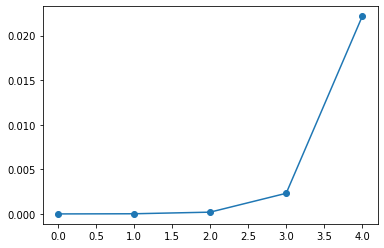

In [31]:
plt.plot(time_enqueue_list,'o-')
plt.plot(time_enqueue_stack,'x-')
plt.ylabel("Time (s)")
plt.xlabel("order of input size, 10^n")
plt.title("Enqueue Time")

<cell>2: error: Name "time_dequeue_stack" is not defined


NameError: name 'time_dequeue_stack' is not defined

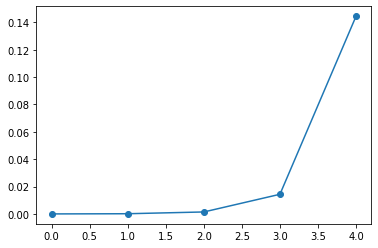

In [28]:
plt.plot(time_dequeue_list,'o-')
plt.plot(time_dequeue_stack,'x-')
plt.ylabel("Time (s)")
plt.xlabel("order of input size, 10^n")
plt.title("Dequeue Time")